# Testing colormaps on the Mallard Fire Pyrocumulonimbus

In [1]:
# Imports
from matplotlib import pyplot as plt
import viscm
import pyart
from colorspacious import (cspace_converter, cspace_convert,
                           CIECAM02Space, CIECAM02Surround)
import numpy as np
import cartopy
import getpass
%matplotlib inline


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



### Load colormaps from this repo

In [2]:
# Use this after updating colormaps.py
%run ../code/colormap_generator.py

/Users/scollis/funded_projects/CVD-colormaps/code/colormap_generator.py:44: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'red' in spec:
/Users/scollis/funded_projects/CVD-colormaps/code/colormap_generator.py:60: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'red' in spec:


### Make colormaps look like viewer has 100% deuteranomaly CVD

In [3]:
# from https://github.com/matplotlib/viscm/blob/master/viscm/gui.py
deuter50_space = {"name": "sRGB1+CVD",
                  "cvd_type": "deuteranomaly",
                  "severity": 100}

deuter50_to_sRGB1 = cspace_converter(deuter50_space, "sRGB1")

def deuter_transform(RGBA):
    # clipping, alpha handling
    RGB = RGBA[..., :3]
    RGB = np.clip(deuter50_to_sRGB1(RGB), 0, 1)
    return np.concatenate((RGB, RGBA[..., 3:]), axis=-1)

In [4]:
deuter_HomeyerRainbow = viscm.gui.TransformedCMap(deuter_transform, HomeyerRainbow)
deuter_HomeyerRainbow.N = HomeyerRainbow.N

deuter_LangRainbow12 = viscm.gui.TransformedCMap(deuter_transform, LangRainbow12)
deuter_LangRainbow12.N = LangRainbow12.N

deuter_NWSRef = viscm.gui.TransformedCMap(deuter_transform, pyart.graph.cm.NWSRef)
deuter_NWSRef.N = pyart.graph.cm.NWSRef.N

deuter_Carbone11 = viscm.gui.TransformedCMap(deuter_transform, pyart.graph.cm.Carbone11)
deuter_Carbone11.N = pyart.graph.cm.Carbone11.N

deuter_Blue_to_red = viscm.gui.TransformedCMap(deuter_transform, Blue_to_red)
deuter_Blue_to_red.N = Blue_to_red.N

deuter_NWSVel = viscm.gui.TransformedCMap(deuter_transform, pyart.graph.cm.NWSVel)
deuter_NWSVel.N = pyart.graph.cm.NWSVel.N

deuter_BuOrR14 = viscm.gui.TransformedCMap(deuter_transform, pyart.graph.cm.BuOrR14)
deuter_BuOrR14.N = pyart.graph.cm.BuOrR14.N

deuter_jet= viscm.gui.TransformedCMap(deuter_transform, plt.get_cmap('jet'))
deuter_jet.N = plt.get_cmap('jet').N

deuter_balance= viscm.gui.TransformedCMap(deuter_transform, balance)
deuter_balance.N = balance.N


### Make colormaps for Protanopia

In [5]:
# from https://github.com/matplotlib/viscm/blob/master/viscm/gui.py
protanopia_space = {"name": "sRGB1+CVD",
                   "cvd_type": "protanomaly",
                   "severity": 100}

protanopia_to_sRGB1 = cspace_converter(protanopia_space, "sRGB1")

def protanopia_transform(RGBA):
    # clipping, alpha handling
    RGB = RGBA[..., :3]
    RGB = np.clip(protanopia_to_sRGB1(RGB), 0, 1)
    return np.concatenate((RGB, RGBA[..., 3:]), axis=-1)

In [6]:
protanopia_HomeyerRainbow = viscm.gui.TransformedCMap(protanopia_transform, HomeyerRainbow)
protanopia_HomeyerRainbow.N = HomeyerRainbow.N

protanopia_LangRainbow12 = viscm.gui.TransformedCMap(protanopia_transform, LangRainbow12)
protanopia_LangRainbow12.N = LangRainbow12.N

protanopia_NWSRef = viscm.gui.TransformedCMap(protanopia_transform, pyart.graph.cm.NWSRef)
protanopia_NWSRef.N = pyart.graph.cm.NWSRef.N

protanopia_Carbone11 = viscm.gui.TransformedCMap(protanopia_transform, pyart.graph.cm.Carbone11)
protanopia_Carbone11.N = pyart.graph.cm.Carbone11.N

protanopia_Blue_to_red = viscm.gui.TransformedCMap(protanopia_transform, Blue_to_red)
protanopia_Blue_to_red.N = Blue_to_red.N

protanopia_NWSVel = viscm.gui.TransformedCMap(protanopia_transform, pyart.graph.cm.NWSVel)
protanopia_NWSVel.N = pyart.graph.cm.NWSVel.N

protanopia_BuOrR14 = viscm.gui.TransformedCMap(protanopia_transform, pyart.graph.cm.BuOrR14)
protanopia_BuOrR14.N = pyart.graph.cm.BuOrR14.N

protanopia_jet= viscm.gui.TransformedCMap(protanopia_transform, plt.get_cmap('jet'))
protanopia_jet.N = plt.get_cmap('jet').N

protanopia_balance= viscm.gui.TransformedCMap(protanopia_transform, balance)
protanopia_balance.N = balance.N


### Read in case data

In [8]:
username = getpass.getuser() 
print(username)

scollis


In [9]:
# Data available from http://noaa-nexrad-level2.s3.amazonaws.com/2018/05/12/KAMA/KAMA20180512_003440_V06
if username == 'scollis':
    radar = pyart.io.read('/data/KAMA20180512_003440_V06')
else:
    radar = pyart.io.read('/Users/tjlang/Documents/Wildfire/mallard/KAMA20180512_003440_V06')

### Colormaps in all their glory

In [10]:
zrng = [-8, 64]
zdrng = [-5, 5]
rhorng = [0, 1]

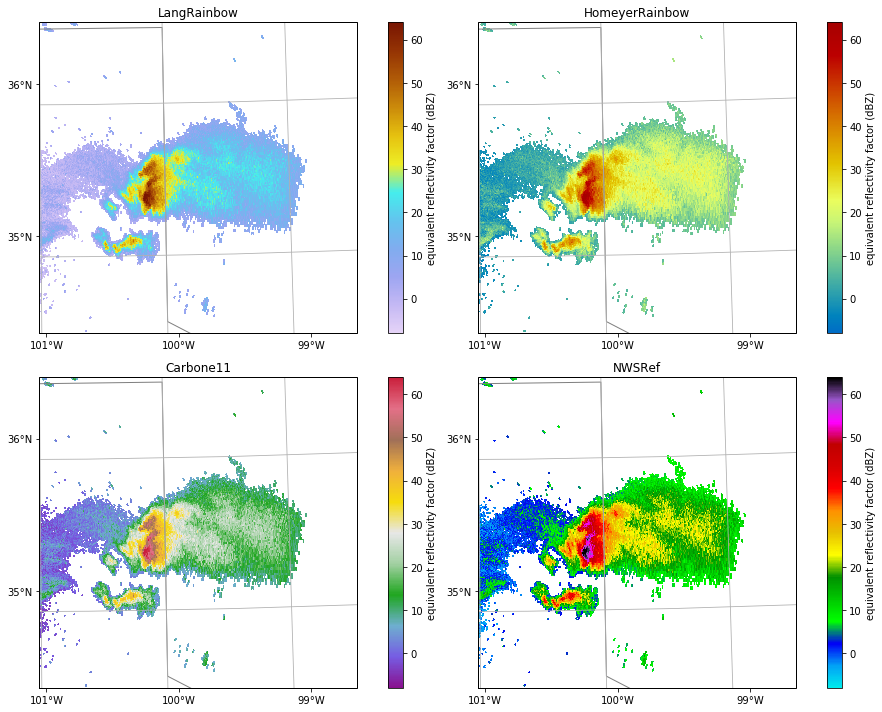

In [11]:
# Reflectivity - No CVD
ext = [-101, -98.5, 34.5, 36.5]
radar_display = pyart.graph.RadarMapDisplayCartopy(radar)
projection = cartopy.crs.LambertConformal(
    central_longitude=radar_display.loc[1], central_latitude=radar_display.loc[0])

f, axarr = plt.subplots(2, 2, subplot_kw={'projection': projection}, figsize=[15, 10])
radar_display.plot_ppi_map('reflectivity', sweep=0, vmin=zrng[0], vmax=zrng[1], 
                           cmap=LangRainbow12, ax=axarr[0][0], title="LangRainbow")
radar_display.plot_ppi_map('reflectivity', sweep=0, vmin=zrng[0], vmax=zrng[1], 
                           cmap=HomeyerRainbow, ax=axarr[0][1], title='HomeyerRainbow')
radar_display.plot_ppi_map('reflectivity', sweep=0, vmin=zrng[0], vmax=zrng[1], 
                           cmap=pyart.graph.cm.Carbone11, ax=axarr[1][0], title='Carbone11')
radar_display.plot_ppi_map('reflectivity', sweep=0, vmin=zrng[0], vmax=zrng[1], 
                           cmap=pyart.graph.cm.NWSRef, ax=axarr[1][1], title='NWSRef')
for ax in np.ravel(axarr):
    ax.set_extent(ext)

plt.tight_layout(w_pad=-15)
plt.savefig('../images/mallard_ref_no_CVD.png')

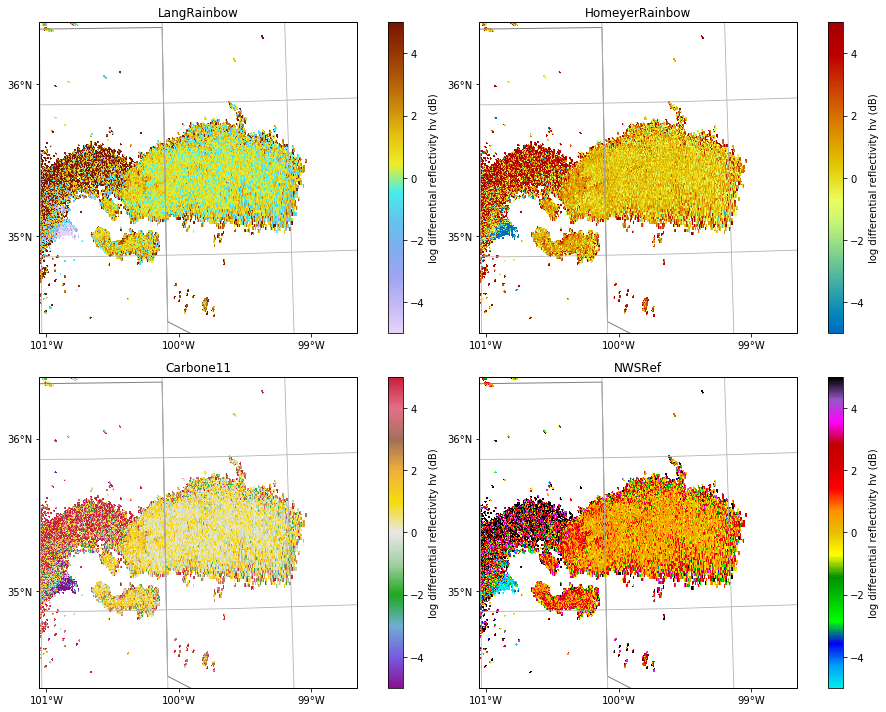

In [12]:
# Differential Reflectivity - No CVD
f, axarr = plt.subplots(2, 2, subplot_kw={'projection': projection}, figsize=[15, 10])
radar_display.plot_ppi_map('differential_reflectivity', sweep=0, vmin=zdrng[0], vmax=zdrng[1], 
                           cmap=LangRainbow12, ax=axarr[0][0], title="LangRainbow")
radar_display.plot_ppi_map('differential_reflectivity', sweep=0, vmin=zdrng[0], vmax=zdrng[1], 
                           cmap=HomeyerRainbow, ax=axarr[0][1], title='HomeyerRainbow')
radar_display.plot_ppi_map('differential_reflectivity', sweep=0, vmin=zdrng[0], vmax=zdrng[1], 
                           cmap=pyart.graph.cm.Carbone11, ax=axarr[1][0], title='Carbone11')
radar_display.plot_ppi_map('differential_reflectivity', sweep=0, vmin=zdrng[0], vmax=zdrng[1], 
                           cmap=pyart.graph.cm.NWSRef, ax=axarr[1][1], title='NWSRef')
for ax in np.ravel(axarr):
    ax.set_extent(ext)

plt.tight_layout(w_pad=-15)
plt.savefig('../images/mallard_zdr_no_CVD.png')

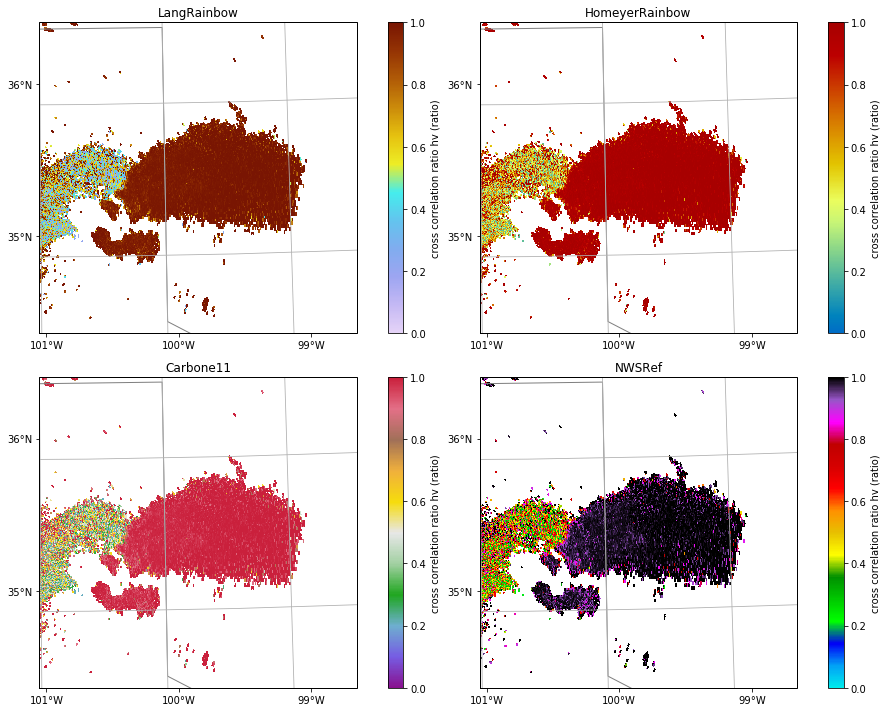

In [13]:
# Correlation Coefficient - No CVD
f, axarr = plt.subplots(2, 2, subplot_kw={'projection': projection}, figsize=[15, 10])
radar_display.plot_ppi_map('cross_correlation_ratio', sweep=0, vmin=rhorng[0], vmax=rhorng[1], 
                           cmap=LangRainbow12, ax=axarr[0][0], title="LangRainbow")
radar_display.plot_ppi_map('cross_correlation_ratio', sweep=0, vmin=rhorng[0], vmax=rhorng[1], 
                           cmap=HomeyerRainbow, ax=axarr[0][1], title='HomeyerRainbow')
radar_display.plot_ppi_map('cross_correlation_ratio', sweep=0, vmin=rhorng[0], vmax=rhorng[1], 
                           cmap=pyart.graph.cm.Carbone11, ax=axarr[1][0], title='Carbone11')
radar_display.plot_ppi_map('cross_correlation_ratio', sweep=0, vmin=rhorng[0], vmax=rhorng[1], 
                           cmap=pyart.graph.cm.NWSRef, ax=axarr[1][1], title='NWSRef')
for ax in np.ravel(axarr):
    ax.set_extent(ext)

plt.tight_layout(w_pad=-15)
plt.savefig('../images/mallard_rho_no_CVD.png')

### Colormaps with deuteranopia filter on

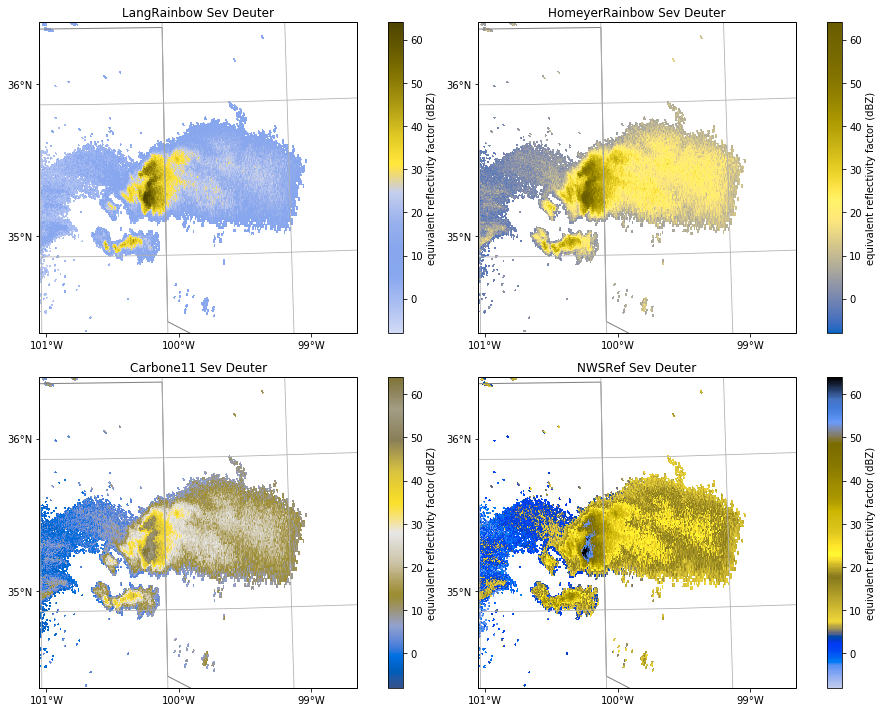

In [14]:
# Reflectivity - Deuteranopia
f, axarr = plt.subplots(2, 2, subplot_kw={'projection': projection}, figsize=[15, 10])
radar_display.plot_ppi_map('reflectivity', sweep=0, vmin=zrng[0], vmax=zrng[1], 
                           cmap=deuter_LangRainbow12, ax=axarr[0][0], title='LangRainbow Sev Deuter')
radar_display.plot_ppi_map('reflectivity', sweep=0, vmin=zrng[0], vmax=zrng[1], 
                           cmap=deuter_HomeyerRainbow, ax=axarr[0][1], title='HomeyerRainbow Sev Deuter')
radar_display.plot_ppi_map('reflectivity', sweep=0, vmin=zrng[0], vmax=zrng[1], 
                           cmap=deuter_Carbone11, ax=axarr[1][0], title='Carbone11 Sev Deuter')
radar_display.plot_ppi_map('reflectivity', sweep=0, vmin=zrng[0], vmax=zrng[1], 
                           cmap=deuter_NWSRef, ax=axarr[1][1], title='NWSRef Sev Deuter')
for ax in np.ravel(axarr):
    ax.set_extent(ext)

plt.tight_layout(w_pad=-15)
plt.savefig('../images/mallard_ref_100_deuter.png')

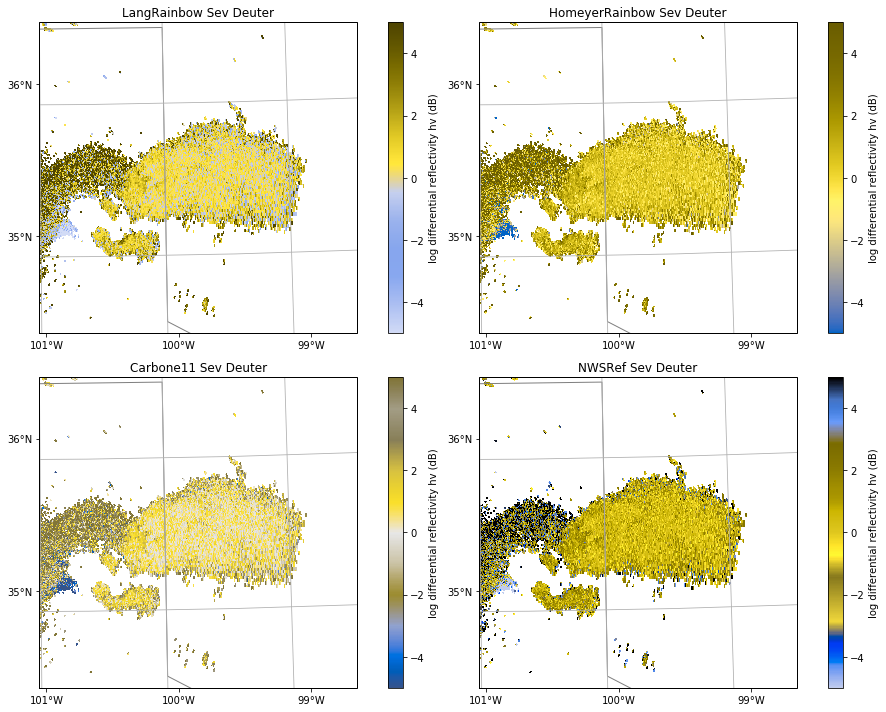

In [15]:
# Differential Reflectivity - Deuteranopia
f, axarr = plt.subplots(2, 2, subplot_kw={'projection': projection}, figsize=[15, 10])
radar_display.plot_ppi_map('differential_reflectivity', sweep=0, vmin=zdrng[0], vmax=zdrng[1], 
                           cmap=deuter_LangRainbow12, ax=axarr[0][0], title='LangRainbow Sev Deuter')
radar_display.plot_ppi_map('differential_reflectivity', sweep=0, vmin=zdrng[0], vmax=zdrng[1], 
                           cmap=deuter_HomeyerRainbow, ax=axarr[0][1], title='HomeyerRainbow Sev Deuter')
radar_display.plot_ppi_map('differential_reflectivity', sweep=0, vmin=zdrng[0], vmax=zdrng[1], 
                           cmap=deuter_Carbone11, ax=axarr[1][0], title='Carbone11 Sev Deuter')
radar_display.plot_ppi_map('differential_reflectivity', sweep=0, vmin=zdrng[0], vmax=zdrng[1], 
                           cmap=deuter_NWSRef, ax=axarr[1][1], title='NWSRef Sev Deuter')
for ax in np.ravel(axarr):
    ax.set_extent(ext)

plt.tight_layout(w_pad=-15)
plt.savefig('../images/mallard_zdr_100_deuter.png')

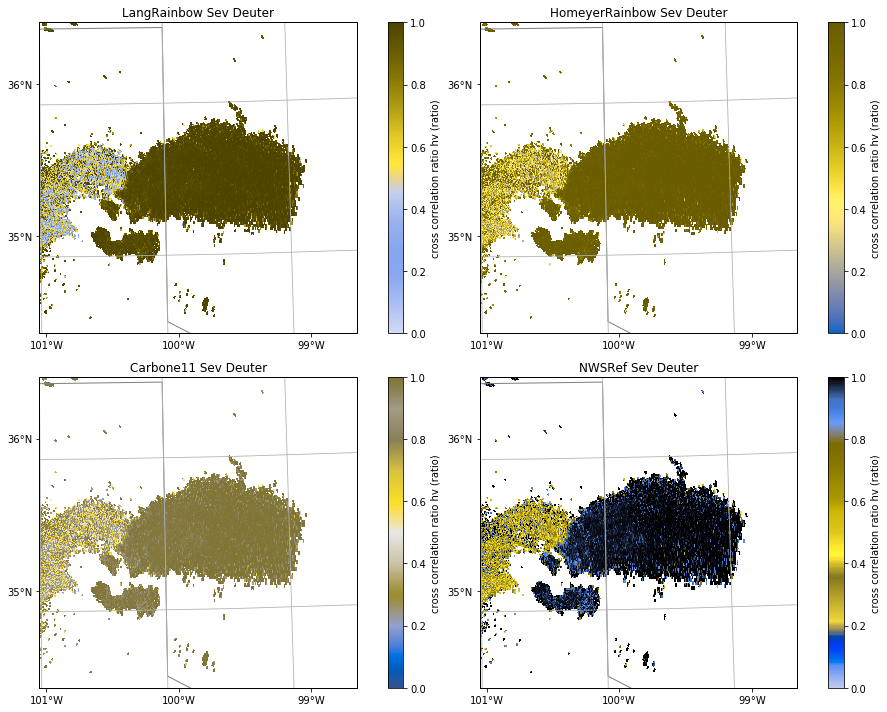

In [16]:
# Correlation Coefficient - Deuteranopia
f, axarr = plt.subplots(2, 2, subplot_kw={'projection': projection}, figsize=[15, 10])
radar_display.plot_ppi_map('cross_correlation_ratio', sweep=0, vmin=rhorng[0], vmax=rhorng[1], 
                           cmap=deuter_LangRainbow12, ax=axarr[0][0], title='LangRainbow Sev Deuter')
radar_display.plot_ppi_map('cross_correlation_ratio', sweep=0, vmin=rhorng[0], vmax=rhorng[1], 
                           cmap=deuter_HomeyerRainbow, ax=axarr[0][1], title='HomeyerRainbow Sev Deuter')
radar_display.plot_ppi_map('cross_correlation_ratio', sweep=0, vmin=rhorng[0], vmax=rhorng[1], 
                           cmap=deuter_Carbone11, ax=axarr[1][0], title='Carbone11 Sev Deuter')
radar_display.plot_ppi_map('cross_correlation_ratio', sweep=0, vmin=rhorng[0], vmax=rhorng[1], 
                           cmap=deuter_NWSRef, ax=axarr[1][1], title='NWSRef Sev Deuter')
for ax in np.ravel(axarr):
    ax.set_extent(ext)

plt.tight_layout(w_pad=-15)
plt.savefig('../images/mallard_rho_100_deuter.png')

### Colormaps with protanopia filter on

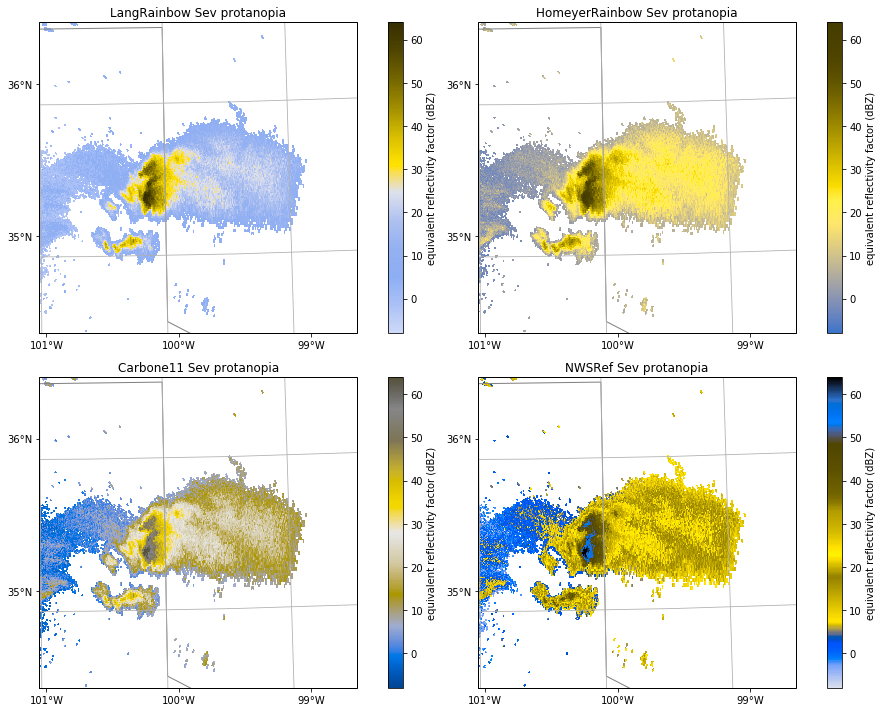

In [17]:
# Reflectivity - Protanopia
f, axarr = plt.subplots(2, 2, subplot_kw={'projection': projection}, figsize=[15, 10])
radar_display.plot_ppi_map('reflectivity', sweep=0, vmin=zrng[0], vmax=zrng[1], 
                           cmap=protanopia_LangRainbow12, ax=axarr[0][0], title='LangRainbow Sev protanopia')
radar_display.plot_ppi_map('reflectivity', sweep=0, vmin=zrng[0], vmax=zrng[1], 
                           cmap=protanopia_HomeyerRainbow, ax=axarr[0][1], title='HomeyerRainbow Sev protanopia')
radar_display.plot_ppi_map('reflectivity', sweep=0, vmin=zrng[0], vmax=zrng[1], 
                           cmap=protanopia_Carbone11, ax=axarr[1][0], title='Carbone11 Sev protanopia')
radar_display.plot_ppi_map('reflectivity', sweep=0, vmin=zrng[0], vmax=zrng[1], 
                           cmap=protanopia_NWSRef, ax=axarr[1][1], title='NWSRef Sev protanopia')
for ax in np.ravel(axarr):
    ax.set_extent(ext)

plt.tight_layout(w_pad=-15)
plt.savefig('../images/mallard_ref_100_protanopia.png')

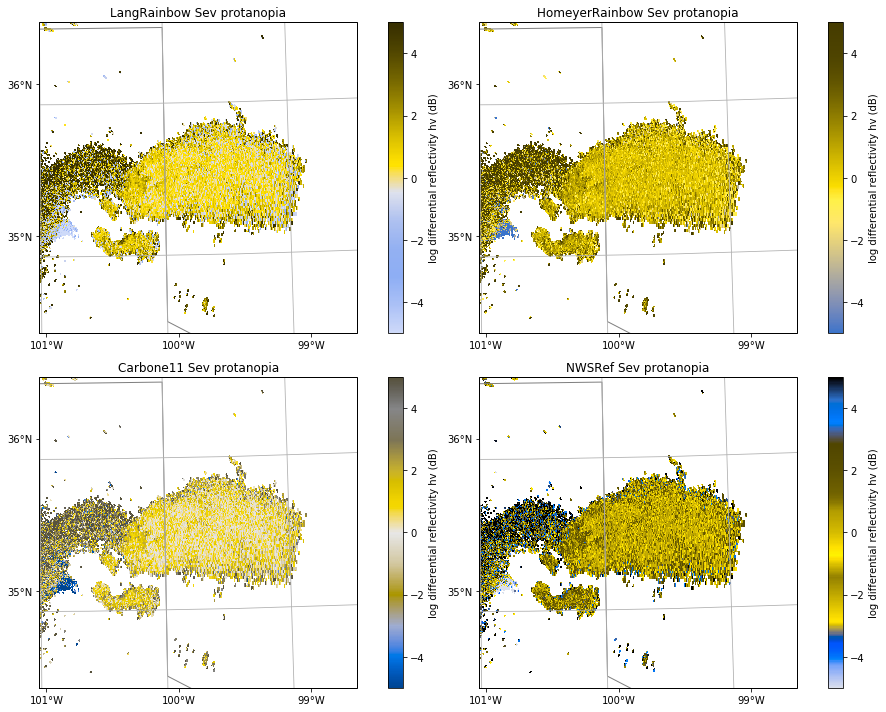

In [18]:
# Differential Reflectivity - Protanopia
f, axarr = plt.subplots(2, 2, subplot_kw={'projection': projection}, figsize=[15, 10])
radar_display.plot_ppi_map('differential_reflectivity', sweep=0, vmin=zdrng[0], vmax=zdrng[1], 
                           cmap=protanopia_LangRainbow12, ax=axarr[0][0], title='LangRainbow Sev protanopia')
radar_display.plot_ppi_map('differential_reflectivity', sweep=0, vmin=zdrng[0], vmax=zdrng[1], 
                           cmap=protanopia_HomeyerRainbow, ax=axarr[0][1], title='HomeyerRainbow Sev protanopia')
radar_display.plot_ppi_map('differential_reflectivity', sweep=0, vmin=zdrng[0], vmax=zdrng[1], 
                           cmap=protanopia_Carbone11, ax=axarr[1][0], title='Carbone11 Sev protanopia')
radar_display.plot_ppi_map('differential_reflectivity', sweep=0, vmin=zdrng[0], vmax=zdrng[1], 
                           cmap=protanopia_NWSRef, ax=axarr[1][1], title='NWSRef Sev protanopia')
for ax in np.ravel(axarr):
    ax.set_extent(ext)

plt.tight_layout(w_pad=-15)
plt.savefig('../images/mallard_zdr_100_protanopia.png')

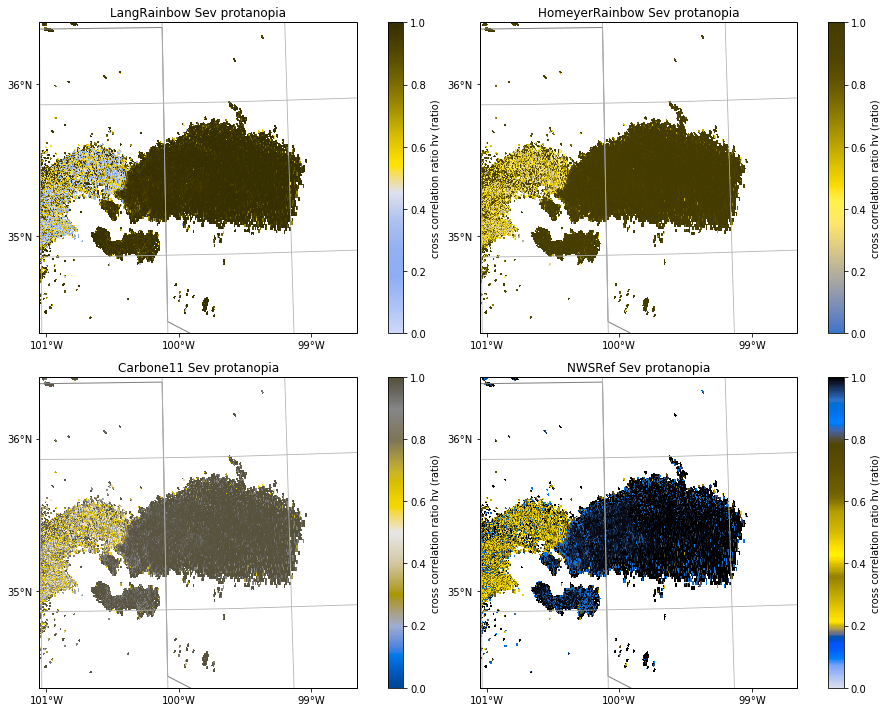

In [19]:
# Correlation Coefficient - Protanopia
f, axarr = plt.subplots(2, 2, subplot_kw={'projection': projection}, figsize=[15, 10])
radar_display.plot_ppi_map('cross_correlation_ratio', sweep=0, vmin=rhorng[0], vmax=rhorng[1], 
                           cmap=protanopia_LangRainbow12, ax=axarr[0][0], title='LangRainbow Sev protanopia')
radar_display.plot_ppi_map('cross_correlation_ratio', sweep=0, vmin=rhorng[0], vmax=rhorng[1], 
                           cmap=protanopia_HomeyerRainbow, ax=axarr[0][1], title='HomeyerRainbow Sev protanopia')
radar_display.plot_ppi_map('cross_correlation_ratio', sweep=0, vmin=rhorng[0], vmax=rhorng[1], 
                           cmap=protanopia_Carbone11, ax=axarr[1][0], title='Carbone11 Sev protanopia')
radar_display.plot_ppi_map('cross_correlation_ratio', sweep=0, vmin=rhorng[0], vmax=rhorng[1], 
                           cmap=protanopia_NWSRef, ax=axarr[1][1], title='NWSRef Sev protanopia')
for ax in np.ravel(axarr):
    ax.set_extent(ext)

plt.tight_layout(w_pad=-15)
plt.savefig('../images/mallard_rho_100_protanopia.png')

In [23]:
nvel= 28. #radar.instrument_parameters['nyquist_velocity']['data'][0]
radar.fields['velocity']['standard_name'] = 'Velocity'
radar.fields['velocity']['long_name'] = 'Velocity'
radar.fields['velocity']['units'] = 'ms$^{-1}$'


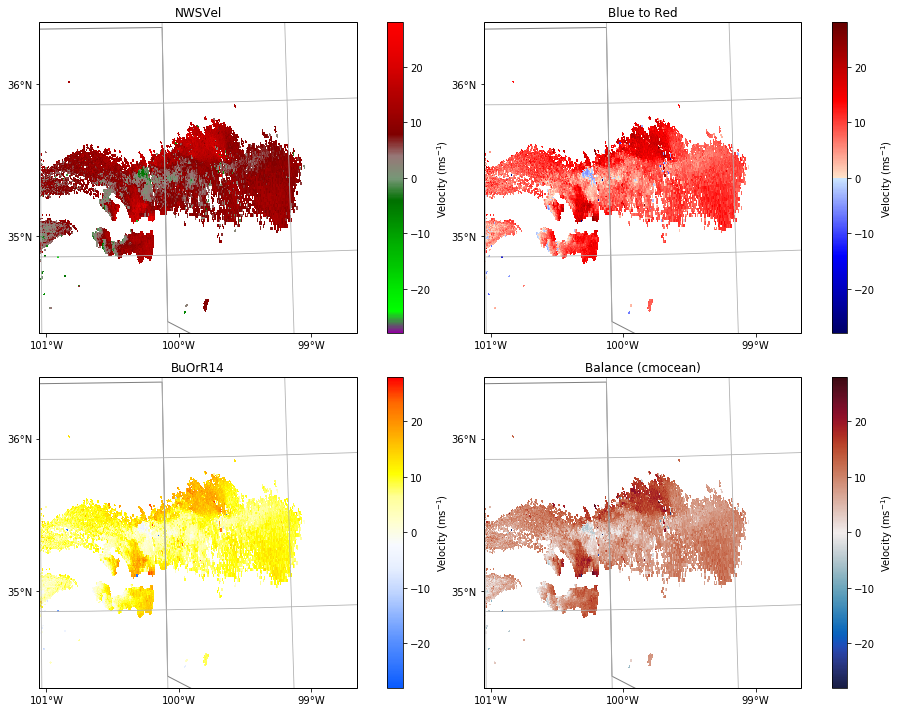

In [24]:

radar_display = pyart.graph.RadarMapDisplayCartopy(radar)
projection = cartopy.crs.LambertConformal(
                    central_longitude=radar_display.loc[1], central_latitude=radar_display.loc[0])

f, axarr = plt.subplots(2, 2, subplot_kw={'projection' : projection}, figsize=[15,10])
radar_display.plot_ppi_map('velocity', sweep=1, vmin=-nvel, vmax=nvel, 
                           cmap=pyart.graph.cm.NWSVel, ax=axarr[0][0], title="NWSVel")
radar_display.plot_ppi_map('velocity', sweep=1, vmin=-nvel, vmax=nvel, 
                           cmap=Blue_to_red, ax=axarr[0][1], title='Blue to Red')
radar_display.plot_ppi_map('velocity', sweep=1, vmin=-nvel, vmax=nvel, 
                           cmap=pyart.graph.cm.BuOrR14, ax=axarr[1][0], title='BuOrR14')
radar_display.plot_ppi_map('velocity', sweep=1, vmin=-nvel, vmax=nvel, 
                           cmap=balance, ax=axarr[1][1], title='Balance (cmocean)')


for ax in np.ravel(axarr):
    ax.set_extent(ext)

plt.tight_layout(w_pad=-15)
plt.savefig('../images/mallard_vel_no_CVD.png')


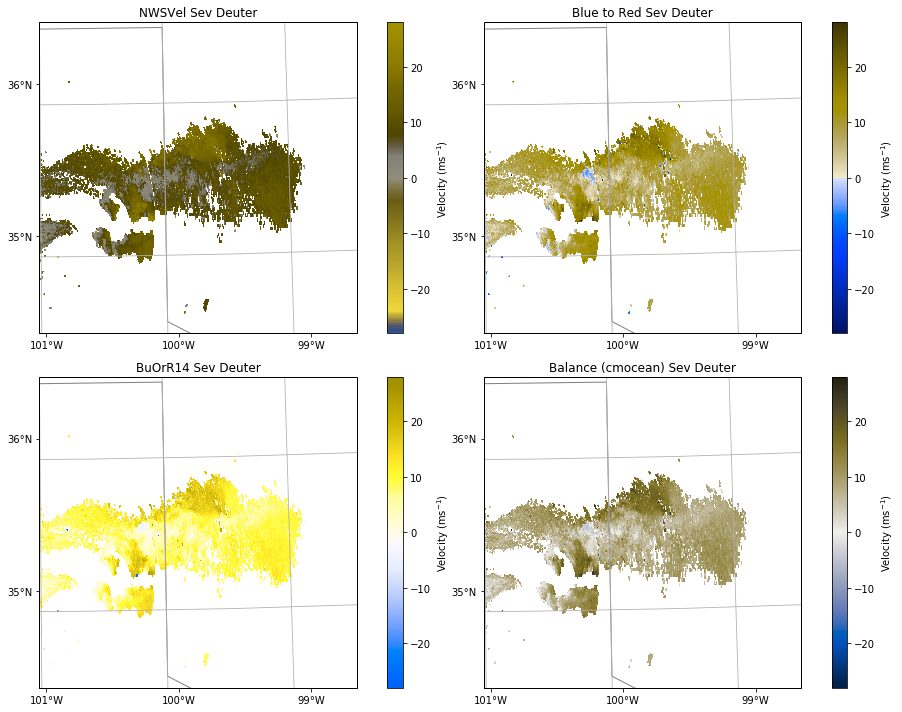

In [25]:
radar_display = pyart.graph.RadarMapDisplayCartopy(radar)
projection = cartopy.crs.LambertConformal(
                    central_longitude=radar_display.loc[1], central_latitude=radar_display.loc[0])

f, axarr = plt.subplots(2, 2, subplot_kw={'projection' : projection}, figsize=[15,10])
radar_display.plot_ppi_map('velocity', sweep=1, vmin=-nvel, vmax=nvel, 
                           cmap=deuter_NWSVel, ax=axarr[0][0], title="NWSVel Sev Deuter")
radar_display.plot_ppi_map('velocity', sweep=1, vmin=-nvel, vmax=nvel, 
                           cmap=deuter_Blue_to_red, ax=axarr[0][1], title='Blue to Red Sev Deuter')
radar_display.plot_ppi_map('velocity', sweep=1, vmin=-nvel, vmax=nvel, 
                           cmap=deuter_BuOrR14, ax=axarr[1][0], title='BuOrR14 Sev Deuter')
radar_display.plot_ppi_map('velocity', sweep=1, vmin=-nvel, vmax=nvel, 
                           cmap=deuter_balance, ax=axarr[1][1], title='Balance (cmocean) Sev Deuter')


for ax in np.ravel(axarr):
    ax.set_extent(ext)


plt.tight_layout(w_pad=-15)

plt.savefig('../images/mallard_vel_100_deuter.png')


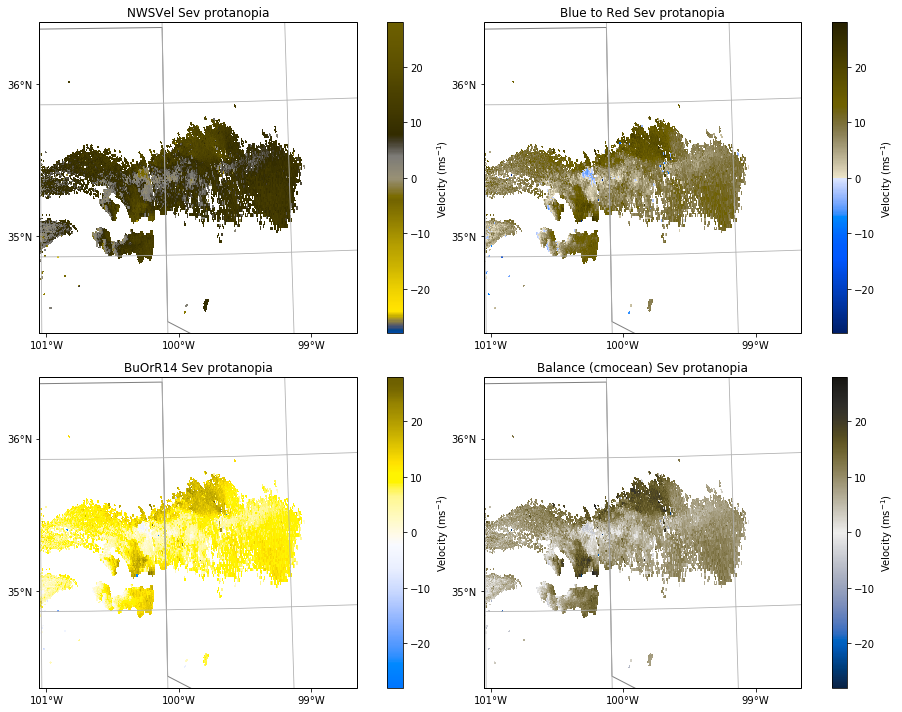

In [26]:
radar_display = pyart.graph.RadarMapDisplayCartopy(radar)
projection = cartopy.crs.LambertConformal(
                    central_longitude=radar_display.loc[1], central_latitude=radar_display.loc[0])

f, axarr = plt.subplots(2, 2, subplot_kw={'projection' : projection}, figsize=[15,10])
radar_display.plot_ppi_map('velocity', sweep=1, vmin=-nvel, vmax=nvel, 
                           cmap=protanopia_NWSVel, ax=axarr[0][0], title="NWSVel Sev protanopia")
radar_display.plot_ppi_map('velocity', sweep=1, vmin=-nvel, vmax=nvel, 
                           cmap=protanopia_Blue_to_red, ax=axarr[0][1], title='Blue to Red Sev protanopia')
radar_display.plot_ppi_map('velocity', sweep=1, vmin=-nvel, vmax=nvel, 
                           cmap=protanopia_BuOrR14, ax=axarr[1][0], title='BuOrR14 Sev protanopia')
radar_display.plot_ppi_map('velocity', sweep=1, vmin=-nvel, vmax=nvel, 
                           cmap=protanopia_balance, ax=axarr[1][1], title='Balance (cmocean) Sev protanopia')

for ax in np.ravel(axarr):
    ax.set_extent(ext)


plt.tight_layout(w_pad=-15)
plt.savefig('../images/mallard_vel_100_protanopia.png')


### Summary Discussion

Pyrocumulonimbus (pyroCb) clouds often have distinct reflectivity (Z), differential reflectivity (ZDR), and correlation coefficient (RHO) signatures (e.g., LaRoche and Lang 2017). The ingested smoke and ash typically feature lower Z, large and noisy ZDR, and low RHO. Meanwhile, within the pyroCb Z typically increases, while ZDR decreases and RHO increases. This reflects a transition from pure smoke/ash to more mixed species inside the core, where ice is present.

Traditional colormaps (e.g., Carbone11) can capture some of this transition even in the face of severe CVD. However, they duplicate colors within the CVD-affected scale, jeopardizing accurate interpretation of the results. More CVD-friendly colormaps like LangRainbow12 and HomeyerRainbow are able to convery accurate information without duplicating colors in the case of CVD. For standard color table limits, HomeyerRainbow appears to have better dynamic range with Z, while LangRainbow12 does better with ZDR and RHO, when impacted by CVD.

LaRoche, K. T. and T. J. Lang, 2017: Observations of Ash, Ice, and Lightning within Pyrocumulus Clouds Using Polarimetric NEXRAD Radars and the National Lightning Detection Network. Mon. Wea. Rev., 145, 4899–4910, https://doi.org/10.1175/MWR-D-17-0253.1